## Regularization

In  the process of model fitting the overfitting problem often occurs. There're some techniques to avoid overfitting and the regularization is one of them.
<br> **Regularization** is a technique for adding some constraints to a model in order to avoid overfitting. 
<br> We add some bias to our model to develop a model that excels at predicting targets for data that follows a regular pattern rather than specific. In other words we fit the model which shows good result on different data. 

## Ridge regression

Ridge regression is similar to Linear regression, but it adds l2-norm regularization to its loss function.

The L2 norm is the Euclidean norm, represented as:
$$ ||x||_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} = (\sum_{i=1}^{n}{|x_i|^2})^{\frac{1}{2}} $$

So the Ridge Loss is:
$$ min \sum_{i=1}^{n}{(y_i - \hat{y_i})^2} + \alpha\sum_{j=1}^{m}{w_j^2}$$
<br> where $w$ is coefficient or weight of each feature in model

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
from sklearn.model_selection import train_test_split

## Load data

We will use dataset of boston house prices. 

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \\$10,000
* PTRATIO: pupil-teacher ratio by town 
* B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
* LSTAT: % lower status of the population
* **MEDV**: Median value of owner-occupied homes in \\$1000s - **TARGET**


Firstly, let's load the dataset and find out its structure.

In [4]:
data = load_boston()

D:\University\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

In [5]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

For our task we need the following fields:
* data - represents feature data as an array of values 
* feature_names - represents names of features, we will consider them as column names 
* target - list of target values related to all sets of features 
* target_name 

In [6]:
features = data.data
feature_names = data.feature_names
target = data.target
target_name = 'MEDV'

In [7]:
features.shape, target.shape

((506, 13), (506,))

In [8]:
df_data = np.concatenate((features, target.reshape(506, 1)), axis=1)
df_data.shape

(506, 14)

In [9]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
col_names = np.append(feature_names, target_name)
col_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='<U7')

In [11]:
df = pd.DataFrame(df_data, columns=col_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

Our data has not any null values and is represented as float64. So we do not need to preprocess the data and can use it directly.

## Build correlation matrix and get rid of redundant features

Let's build the correlation matrix to find out how our target depends on features and how features depends on each other.

<AxesSubplot:>

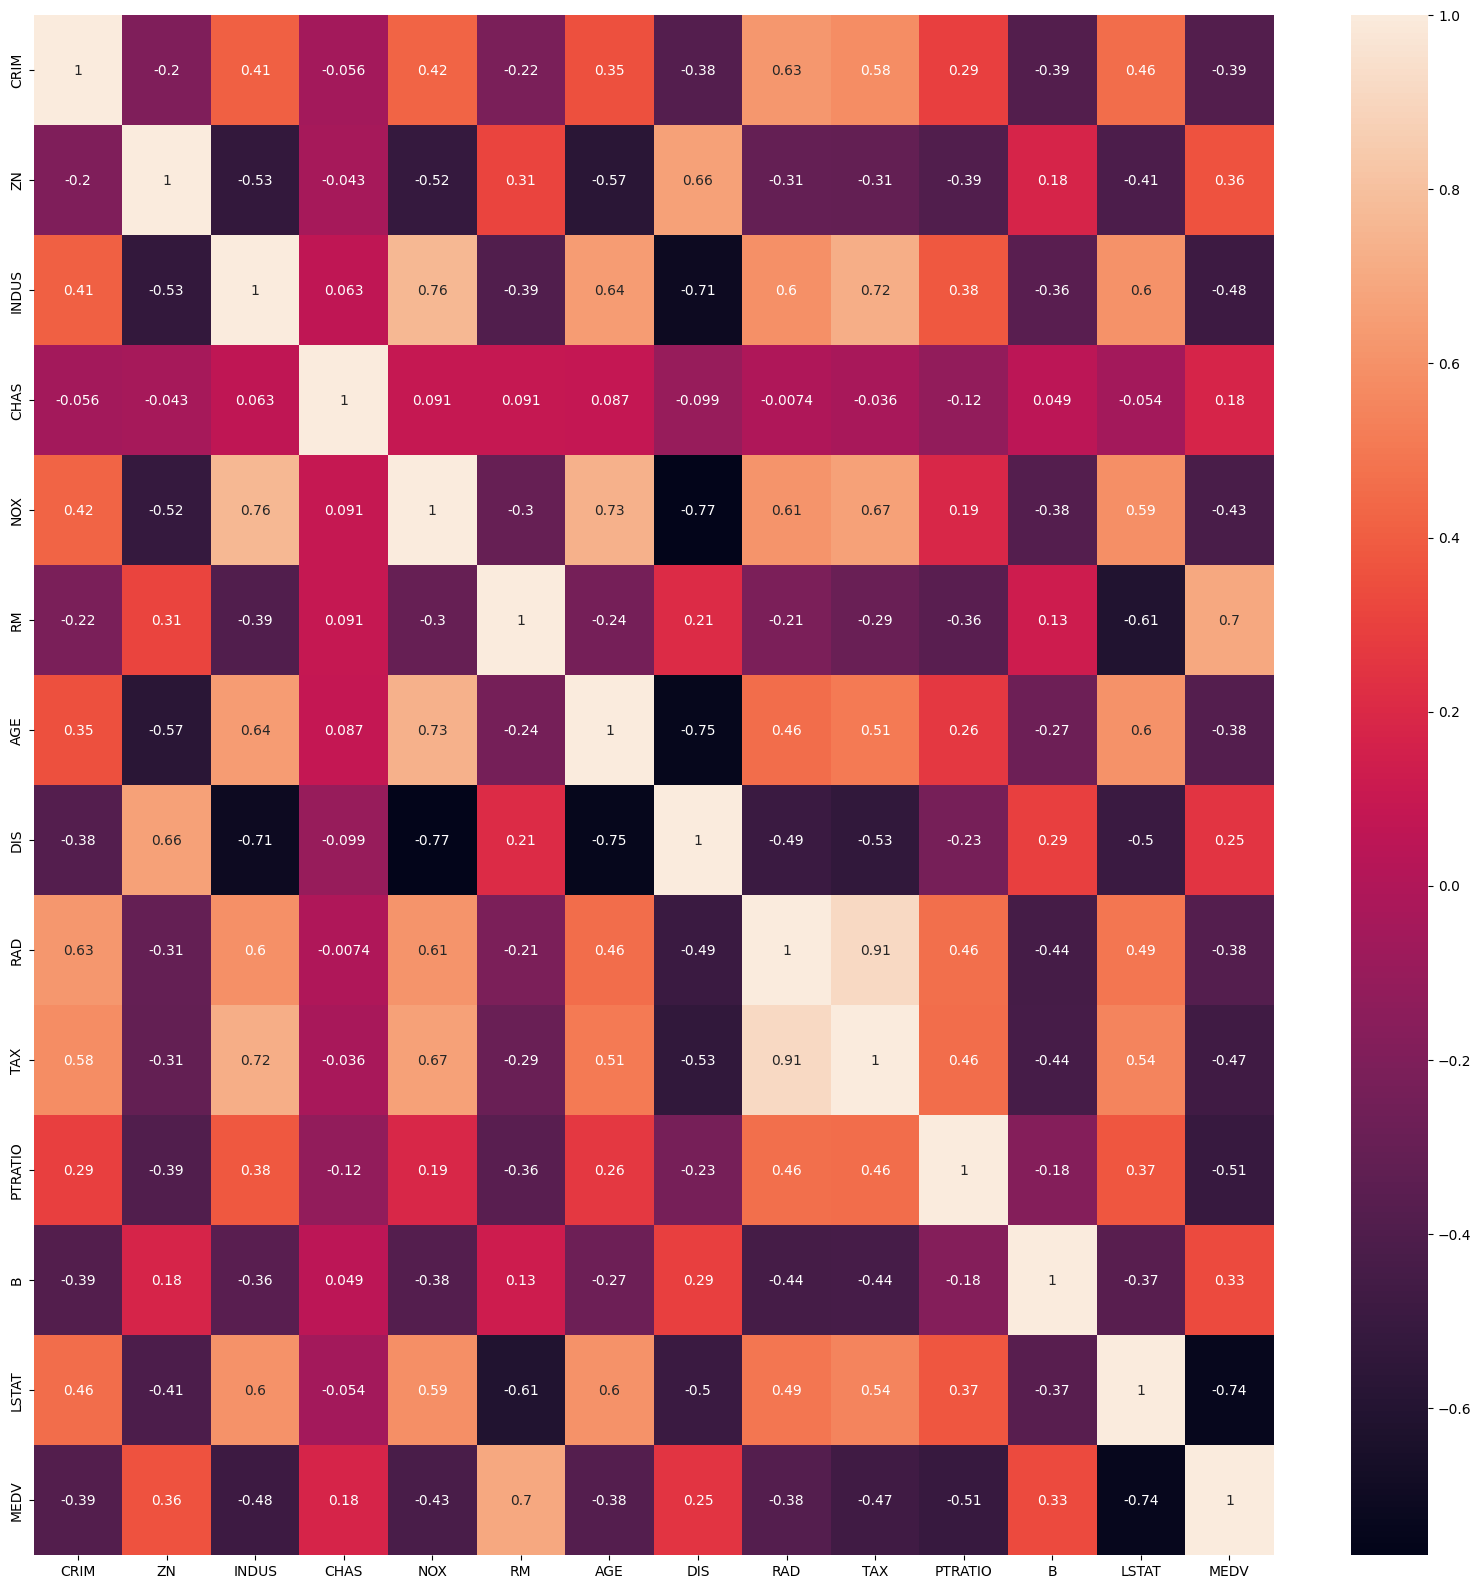

In [14]:
plt.figure(figsize=[20, 20])
sns.heatmap(df.corr(), annot=True)

As we can see there are some features which are high correlated to each other. We need to exclude one of the features for each high correlated pair to avoid our model being sensitive to data.

In [15]:
## get dataframe of features only
features_df = df.drop([target_name], axis=1)
features_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [16]:
def get_correlation_pairs(data_frame):
    abs_correlation_matrix = data_frame.corr().abs()
    sorted_pairs = abs_correlation_matrix.unstack().sort_values(ascending=False)
    return sorted_pairs

In [17]:
sorted_pairs = get_correlation_pairs(features_df)

In [18]:
# high correlation
sorted_pairs[sorted_pairs > 0.7]

CRIM     CRIM       1.000000
ZN       ZN         1.000000
B        B          1.000000
PTRATIO  PTRATIO    1.000000
TAX      TAX        1.000000
RAD      RAD        1.000000
DIS      DIS        1.000000
RM       RM         1.000000
NOX      NOX        1.000000
CHAS     CHAS       1.000000
INDUS    INDUS      1.000000
AGE      AGE        1.000000
LSTAT    LSTAT      1.000000
RAD      TAX        0.910228
TAX      RAD        0.910228
NOX      DIS        0.769230
DIS      NOX        0.769230
NOX      INDUS      0.763651
INDUS    NOX        0.763651
DIS      AGE        0.747881
AGE      DIS        0.747881
         NOX        0.731470
NOX      AGE        0.731470
TAX      INDUS      0.720760
INDUS    TAX        0.720760
         DIS        0.708027
DIS      INDUS      0.708027
dtype: float64

In [19]:
def get_redundant_columns(correlation_pairs, names, threshold=0.7):
    redundant_columns = set()
    checked = set()
    for name in names:
        pairs = correlation_pairs[name]
        checked.add(name)
        for i in range(len(pairs)):
            col = pairs.index[i]
            if (col not in redundant_columns and col not in checked):
                if (pairs[i] > threshold):
                    redundant_columns.add(col)
    return redundant_columns

In [20]:
redundant = get_redundant_columns(sorted_pairs, feature_names)
redundant

{'AGE', 'DIS', 'NOX', 'TAX'}

In [21]:
optimal_df = df.drop(redundant, axis=1)

In [22]:
len(optimal_df.columns), len(df.columns)

(10, 14)

<AxesSubplot:>

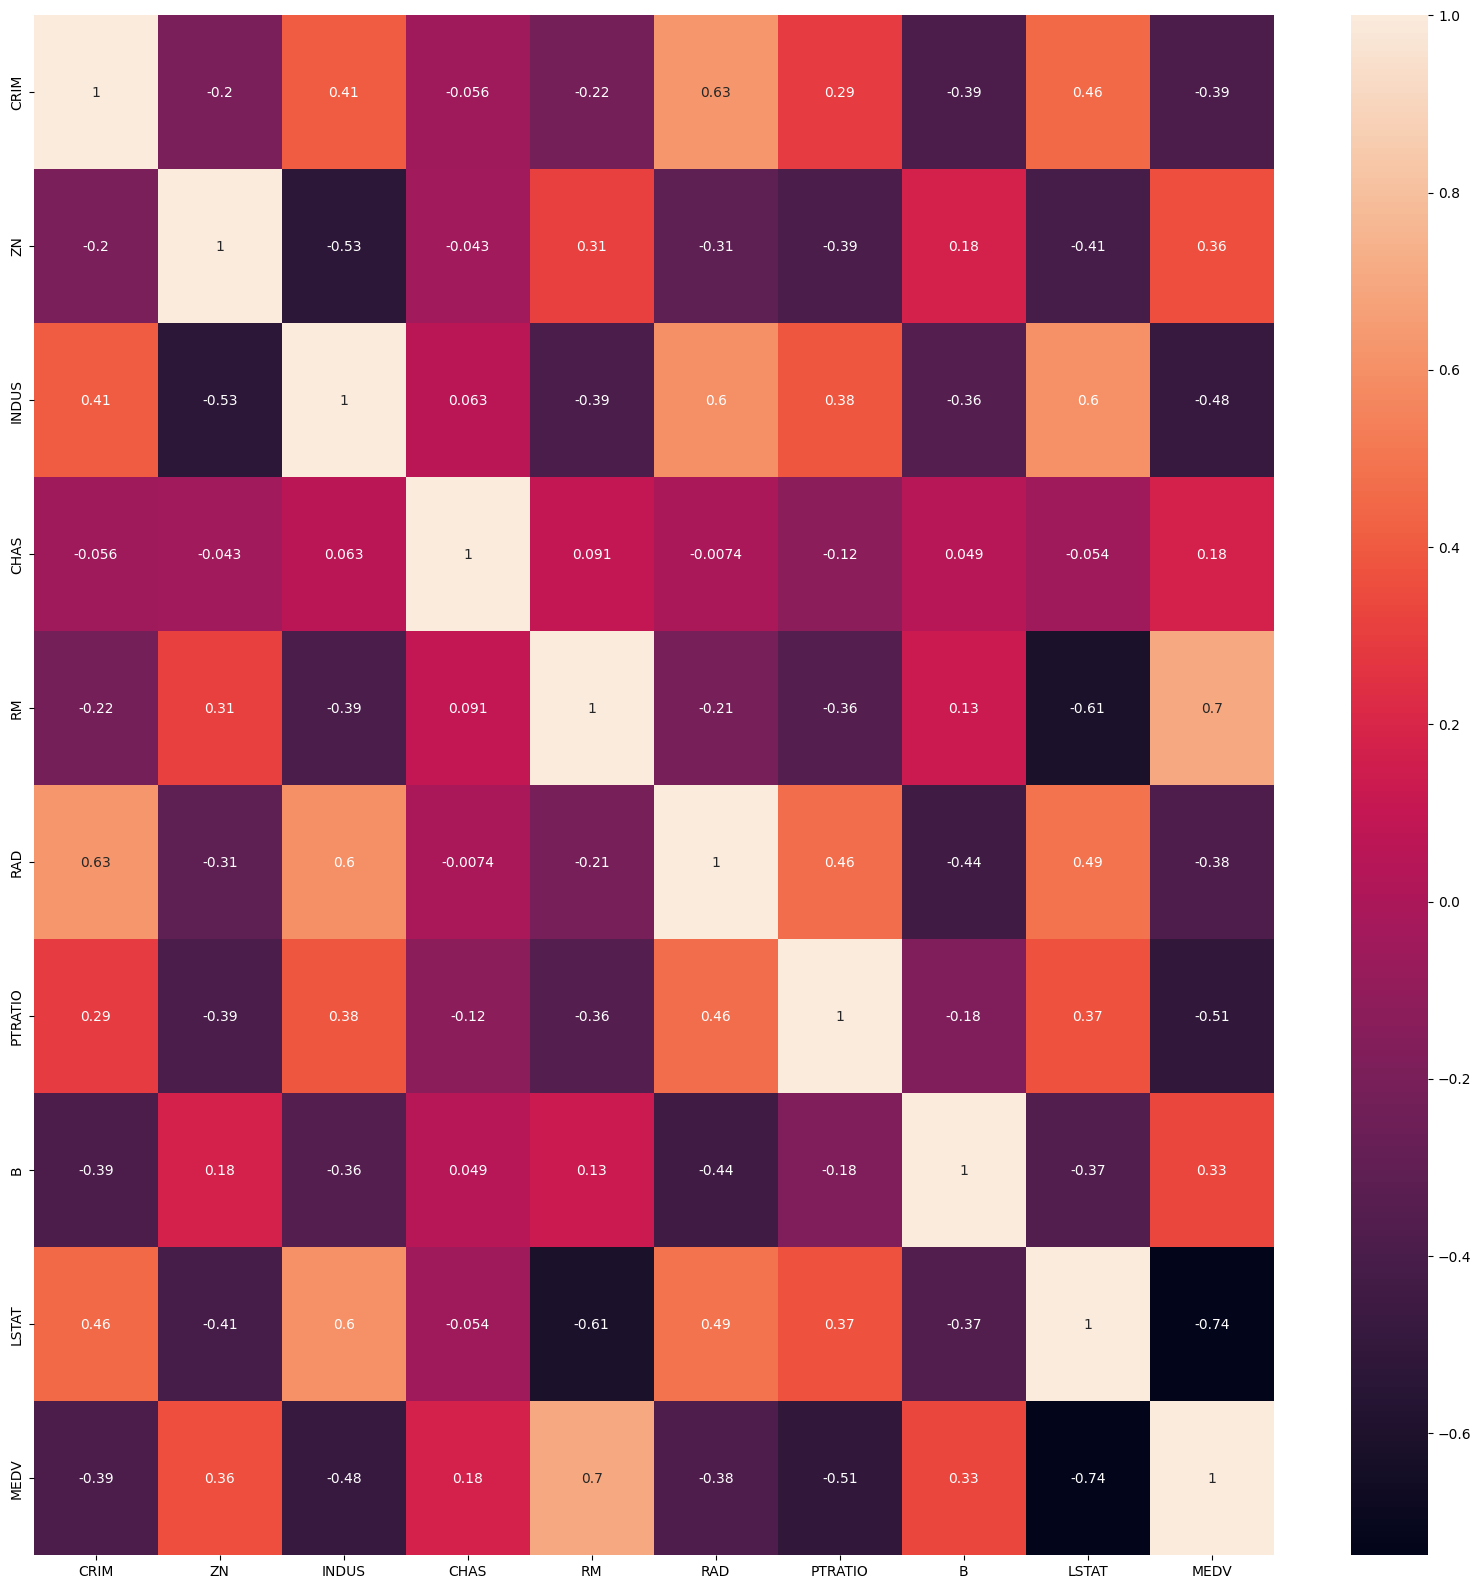

In [23]:
plt.figure(figsize=[20, 20])
sns.heatmap(optimal_df.corr(), annot=True)



## Fit linear regression firstly

We will build linear model firstly to compare its coefficients with future ridge model.

In [24]:
X = optimal_df.drop([target_name], axis=1)
y = optimal_df[target_name]

### Normalization 
### $ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $

Values in different columns are in very different ranges. Some features will influence the model more than others due to this difference. So we need to normalize our data to get more correct result.

In [25]:
X_norm = (X - np.min(X)) / (np.max(X) - np.min(X)).values

D:\University\env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\University\env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [26]:
X_norm.head(3)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.577505,0.000000,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.547998,0.043478,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.694386,0.043478,0.553191,0.989737,0.063466


### Split train and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=38)

In [28]:
X_train.shape, y_train.shape

((379, 9), (379,))

### fit model

In [29]:
linear_model = LinearRegression()

In [30]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [31]:
linear_coefs = linear_model.coef_
linear_coefs

array([-0.07392311, -0.0076657 , -0.0438646 ,  3.85898058,  4.19686212,
        0.0956923 , -1.01421441,  0.01077616, -0.52102829])

In [32]:
linear_coefs.shape, X.columns.shape

((9,), (9,))

<AxesSubplot:title={'center':'Linear coefficients'}>

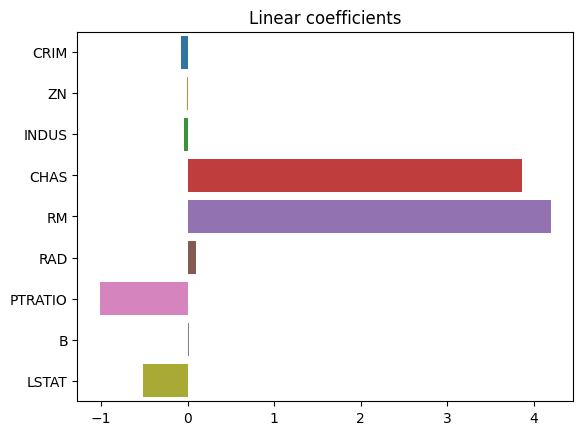

In [33]:
plt.title('Linear coefficients')
sns.barplot(x=linear_coefs, y=X.columns)

RM and CHAS has largest coefficients. The implication of this will be that housing prices will be driven more significantly by these two features leading to overfitting, where generalizable patterns have not been learned.
<br> In order to prevent the overfitting we can use Ridge Redgression as a regularization method.

## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
alpha = 10

In [36]:
ridge_model = Ridge(alpha=alpha)

In [37]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [38]:
ridge_coefs = ridge_model.coef_
ridge_coefs

array([-0.07589207, -0.00802002, -0.04164001,  2.81515479,  3.88830112,
        0.10173474, -1.04488803,  0.01077905, -0.5419986 ])

In [39]:
ridge_coefs, linear_coefs

(array([-0.07589207, -0.00802002, -0.04164001,  2.81515479,  3.88830112,
         0.10173474, -1.04488803,  0.01077905, -0.5419986 ]),
 array([-0.07392311, -0.0076657 , -0.0438646 ,  3.85898058,  4.19686212,
         0.0956923 , -1.01421441,  0.01077616, -0.52102829]))

<AxesSubplot:title={'center':'Ridge regression'}>

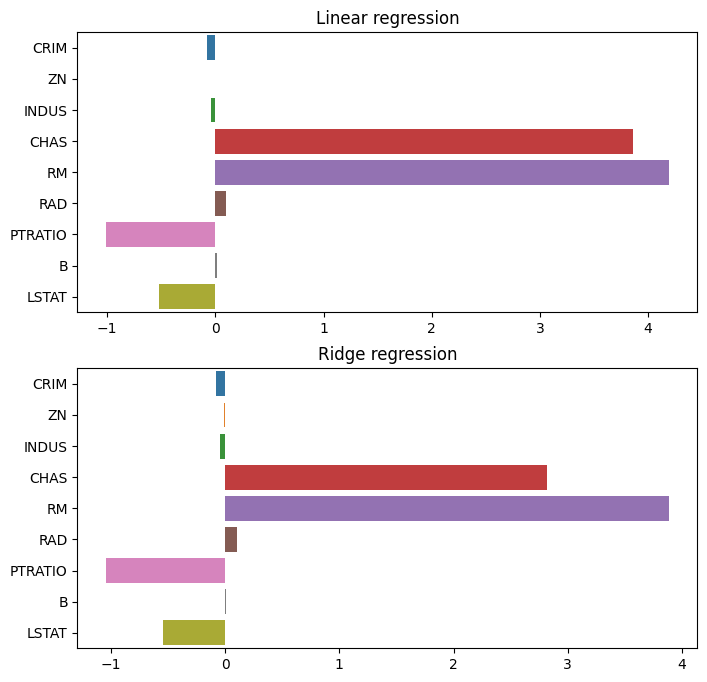

In [40]:
plt.figure(figsize=[8, 8])
plt.subplot(2, 1, 1)
plt.title('Linear regression')
sns.barplot(x=linear_coefs, y=X.columns)
plt.subplot(2, 1, 2)
plt.title('Ridge regression')
sns.barplot(x=ridge_coefs, y=X.columns)

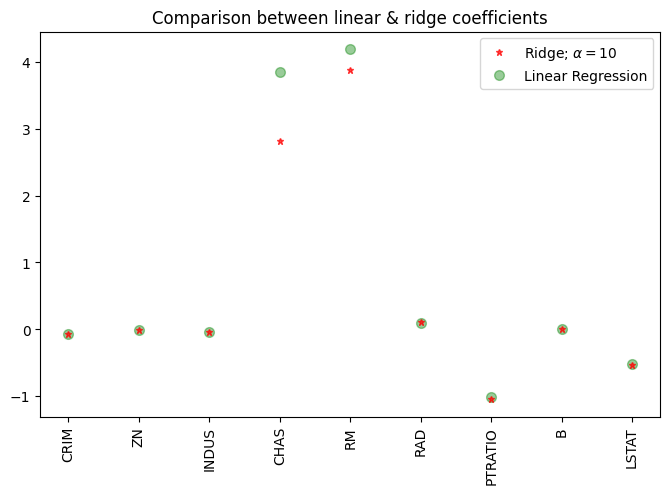

In [41]:
plt.figure(figsize = (8,5))
plt.title('Comparison between linear & ridge coefficients')
plt.plot(X.columns,ridge_coefs,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(X.columns, linear_coefs,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

We have got some decreasing of CHAS and RM coefficients. But they are still significantly higher than others.

## Evaluate model

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
linear_test_prediction = linear_model.predict(X_test)
ridge_test_prediction = ridge_model.predict(X_test)

### Score - coefficient of determination $(R^2)$

Coefficient of determination is a proportion of variance of a target variable and shows how well the model fits the data.

$$R^2=1-\frac{\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}}{\sum_{i=1}^{n}{(y_i-\overline{y})^2}}$$

In [44]:
print("linear coefficient of determination")
print("train: ", linear_model.score(X_train, y_train))
print("test: ", linear_model.score(X_test, y_test))

linear coefficient of determination
train:  0.7074264163682955
test:  0.6725588666612796


In [45]:
print("ridge coefficient of determination")
print("train ", ridge_model.score(X_train, y_train))
print("test ", ridge_model.score(X_test, y_test))

ridge coefficient of determination
train  0.7061517013975298
test  0.6733201143907734


### RMSE (Root Mean Squared Error)

$$ RMSE = \sqrt{\frac{1}{n}\cdot \sum_{i=1}^{n}{(y_i – \hat{y_i})^2}} $$

In [46]:
print("RMSE")
print("linear: ", mean_squared_error(y_test, linear_test_prediction, squared=False))
print("ridge: ", mean_squared_error(y_test, ridge_test_prediction, squared=False))

RMSE
linear:  5.214020162606925
ridge:  5.2079557586485095


# Fit model with initial data with all features

Ridge regression predict data with highly correlated features, so let's try fit the model with all the features

In [47]:
alpha=10
ridge_model_2 = Ridge(alpha)

In [48]:
XX = df.drop([target_name], axis=1)
yy = df[target_name]

In [49]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=.25, random_state=38)

In [50]:
ridge_model_2.fit(XX_train, yy_train)

Ridge(alpha=10)

In [51]:
print("train score ", ridge_model_2.score(XX_train, yy_train))
print("test score ", ridge_model_2.score(XX_test, yy_test))

train score  0.7361416344955346
test score  0.7062119418692503


In [52]:
ridge2_pred = ridge_model_2.predict(XX_test)

In [53]:
rmse = mean_squared_error(yy_test, ridge2_pred, squared=False)
print("rmse = ", rmse)

rmse =  4.938819545050691


There's no significalnt improvents in model evaluation

In [54]:
ridge2_pred

array([ 1.64682763e+01,  1.94290014e+01,  2.60019816e+01,  3.29814811e+01,
        1.88003313e+01,  3.21708987e+01,  2.14218716e+01,  2.56856725e+01,
        2.97322452e+01,  3.37186892e+01,  2.03935265e+01,  2.43619860e+01,
        2.16930282e+01,  2.80085438e+01,  2.50960032e+01,  2.35324697e+01,
        1.95985894e+01,  1.34543605e+01,  2.93105944e+01,  2.89204177e+01,
        2.58384894e+01,  3.89713793e+01,  2.11642203e+01,  2.04875800e+01,
        1.62717474e+01, -2.66118562e-02,  1.34825196e+01,  3.11537223e+01,
        2.69499486e+01,  2.01769156e+01,  2.26113664e+01,  2.48383009e+01,
        2.65334179e+01,  1.52632573e+01,  2.81355142e+01,  1.47209024e+01,
        1.42991289e+01,  2.11109379e+01,  2.89134007e+01,  2.58626519e+01,
        2.98941563e+01,  1.92526640e+01,  2.29655897e+01,  2.01598648e+01,
        2.55420859e+01,  1.49799261e+01,  1.67443339e+01,  2.34262227e+01,
        1.21448239e+01,  2.29648187e+01,  2.40158632e+01,  1.52487744e+01,
        2.73991804e+01,  

In [55]:
yy_test

26     16.6
109    19.4
111    22.8
304    36.1
470    19.9
       ... 
232    41.7
147    14.6
429     9.5
200    32.9
345    17.5
Name: MEDV, Length: 127, dtype: float64

## Literature

* Boston House Prices | Kaggle - https://www.kaggle.com/datasets/vikrishnan/boston-house-prices
* Ridge Regression | NCSS Statistical Software - https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf
* sklearn.linear_model.Ridge | skicit-learn.org - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* Ridge and Lasso Regression: L1 and L2 Regularization | TowardsDataScience - https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
* L2 vs L1 Regularization in Machine Learning | Analytics Steps - https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning